<a href="https://colab.research.google.com/github/eduardodacostasoares/pytorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is on thing or another (there can be multiple things as the options)

URL = https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get ir ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# Make samples

n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First five samples of X:\n {X[:5]}")
print(f"First five samples of y:\n {y[:5]}")

First five samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:
 [1 1 1 1 0]


In [ ]:
# Make Dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


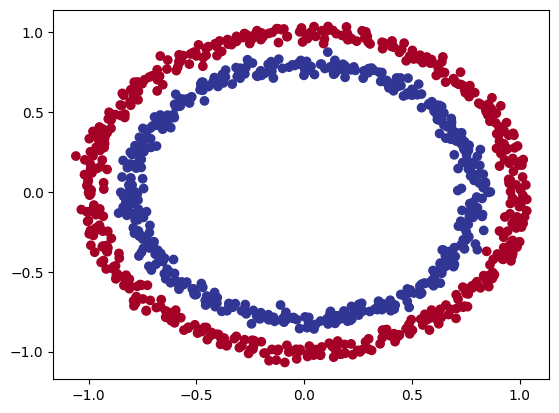

In [ ]:
# Visualizing the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note**: The data is often referred to as a "toy dataset", a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors AND create train and test splits


In [ ]:
import torch
torch.__version__

'2.1.0+cu118'

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Turn into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% of data will be test and 80% will be train
                                                    random_state=42)


In [ ]:
len(X_train), len(X_test), len(y_test), len(y_train)

(800, 200, 200, 800)

## 2. Building a model

Build model to classify blue and red dots.

To do so, we want to:

1. Setup device agnostic code so our code will roun on an accelerator (GPU) if there is one;
2. Construct a model(by subclassing `nn.Module`);
3. Define a loss function and optimizer;
4. Create a training and test loop

In [ ]:
# import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Constructing a model
1. Subclasse `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable to handle the data;
3. Defines a `forward()` method that ouytlines the forward pass (or forward computation) of the model;
4. Instantiate an instance of our model class and send it to the target `device`

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (Same shape as X) and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, from previous layer, and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device

model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

**Note**: out_features in layer_n (layer_1, in case) has to match up to in_features in next layer (in case, layer_2), otherwise we'll get shape mismatch errors

# Replicating the model above using nn.Sequential() - it is not recommended to more complex models



In [ ]:
#model_0 = nn.Sequential(
#    nn.Linear(in_features=2, out_features=5),
#    nn.Linear(in_features=5, out_features=1)
#).to(device)

#model_0'''

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Lenght of test samples: {len(X_test)}, Shape {X_test.shape}")
  print(f"\nFirst 10 prediction:\n{untrained_preds[:10]}")
  print(f"\nFirst 10 labels:\n{y_test[:10]}")

Lenght of predictions: 200, Shape: torch.Size([200, 1])
Lenght of test samples: 200, Shape torch.Size([200, 2])

First 10 prediction:
tensor([[ 0.0486],
        [ 0.1319],
        [-0.0924],
        [ 0.0882],
        [ 0.0304],
        [ 0.0803],
        [ 0.2175],
        [ 0.2058],
        [-0.0974],
        [ 0.1388]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should be used?
ANSWER: This is problem specific!

1. For example for **regression** you might want to use MAE or MSE (mean absolute error or mean squared error).

2. For **classification** you might want **binary cross entropy**/**categorical cross entropy** (cross entropy).

As a reminder, the loss function measures *how wrong* are the model's predictions

And for optimizers, two of the mos common and useful are **Adam** and **SGD**.

* For some common choices of loss function and optimizers - https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer

* For the loss functions will be used `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy (BCE) : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

* For a definition on what a logit is in deep learning: https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow

* For different optimizers see `torch.optim`.

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in.


optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model

To train a model it's needed to build a training loop with the following steps:

1. Forward pass;
2. Calculate the loss;
3. Optimizer zero grad;
4. Loss backward (backpropagation);
5. Optimizer (gradient descent).

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be **logits** (raw outputs of the model, without the activation function).

Logits can be converted into prediction probabilities by passing them to some kind of activation function. (e.g. Sigmoid for "binary classification" and Softmax for multiclass classification)

Then, the model's prediction probabilities can be converted to **prediction labels** by either rounding them (used in Binary Classification) or taking the `argmax()` (used in Softmax activation).

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.0486],
        [ 0.1319],
        [-0.0924],
        [ 0.0882],
        [ 0.0304]], device='cuda:0')

In [ ]:
# Use the sigmoid activation function on the model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5121],
        [0.5329],
        [0.4769],
        [0.5220],
        [0.5076]], device='cuda:0')

For the prediction probability values, perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, so `y=1` (class 1)
* `y_pred_probs` < 0.5, so `y=0` (class 2)

In [ ]:
# find the predicted labels
y_preds = torch.round (y_pred_probs)

# In full (logits [model_0(X_test.to(device)]-> pred probs [torch.sigmoid()] -> pred labels [torch.round()])
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 1.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device (CUDA)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expect raw logits ("y_logits") as input
                 y_train)  # nn.BCELoss expects predictions probabilities ("y_pred") as input.

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)
  # 3., Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descend)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}" )

Epoch: 0 | Loss: 0.69403 | Accuracy: 51.88 | Test loss: 0.69842 | Test acc: 47.50
Epoch: 10 | Loss: 0.69363 | Accuracy: 51.00 | Test loss: 0.69750 | Test acc: 47.50
Epoch: 20 | Loss: 0.69344 | Accuracy: 50.75 | Test loss: 0.69693 | Test acc: 47.50
Epoch: 30 | Loss: 0.69333 | Accuracy: 50.25 | Test loss: 0.69652 | Test acc: 47.50
Epoch: 40 | Loss: 0.69325 | Accuracy: 50.12 | Test loss: 0.69621 | Test acc: 48.00
Epoch: 50 | Loss: 0.69319 | Accuracy: 50.25 | Test loss: 0.69595 | Test acc: 48.50
Epoch: 60 | Loss: 0.69315 | Accuracy: 50.38 | Test loss: 0.69575 | Test acc: 48.50
Epoch: 70 | Loss: 0.69311 | Accuracy: 50.75 | Test loss: 0.69557 | Test acc: 47.50
Epoch: 80 | Loss: 0.69309 | Accuracy: 50.62 | Test loss: 0.69543 | Test acc: 47.00
Epoch: 90 | Loss: 0.69306 | Accuracy: 50.50 | Test loss: 0.69530 | Test acc: 47.50


## 4. Make predictions and evaluate the model

From the metrics looks like the model isn't learning anything...

So, it's necessary to make some predictions and make them visual.

The function called `plot_decision_boundary()`

URL - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
from pathlib  import Path

# Download helper function from Learn PyTroch repository (If it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading 'helper_functions.py'...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download...


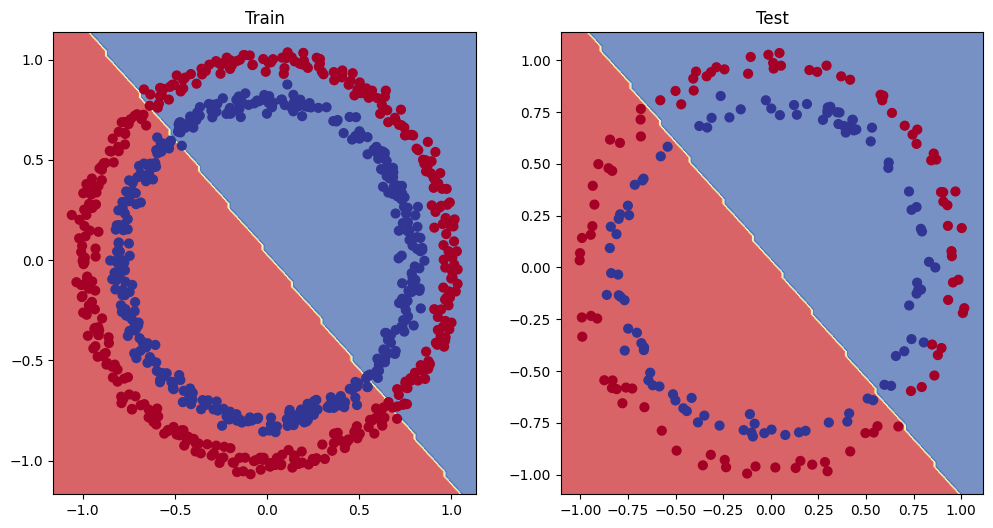

In [ ]:
# plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data;

* Add more hidden uniots - go from 5 hidden units to 10 hidden units;

* Fit for longer - increasing the numbers of `epochs`

* Changing the activation functions (Used: Sigmoid; New: e.g. ReLU

* Changing the learning rate

* Changing the loss function (Used: `BCEWithLogitsLoss`)

This options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**

Improving the model:
* Adding more layers: 5 -> 10
* Increase the number of layers: 2 -> 3
* Epochs: 100 -> 1000

Generally, when you're doing machine learning experiments, you only like **to change one value at time** and track the results.

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possivle behind the scenes.

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [ ]:
# Training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f} | Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}")

Epoch: 0 | Loss: 0.69396 | Accuracy: 50.50 | Test loss: 0.69261 | Test accuracy: 51.00
Epoch: 100 | Loss: 0.69369 | Accuracy: 50.50 | Test loss: 0.69269 | Test accuracy: 50.00
Epoch: 200 | Loss: 0.69351 | Accuracy: 50.50 | Test loss: 0.69282 | Test accuracy: 49.50
Epoch: 300 | Loss: 0.69339 | Accuracy: 50.50 | Test loss: 0.69295 | Test accuracy: 49.00
Epoch: 400 | Loss: 0.69329 | Accuracy: 50.50 | Test loss: 0.69309 | Test accuracy: 48.50
Epoch: 500 | Loss: 0.69322 | Accuracy: 50.50 | Test loss: 0.69322 | Test accuracy: 49.50
Epoch: 600 | Loss: 0.69317 | Accuracy: 50.50 | Test loss: 0.69335 | Test accuracy: 53.00
Epoch: 700 | Loss: 0.69313 | Accuracy: 50.50 | Test loss: 0.69347 | Test accuracy: 50.50
Epoch: 800 | Loss: 0.69309 | Accuracy: 50.50 | Test loss: 0.69358 | Test accuracy: 51.00
Epoch: 900 | Loss: 0.69307 | Accuracy: 50.50 | Test loss: 0.69368 | Test accuracy: 47.50


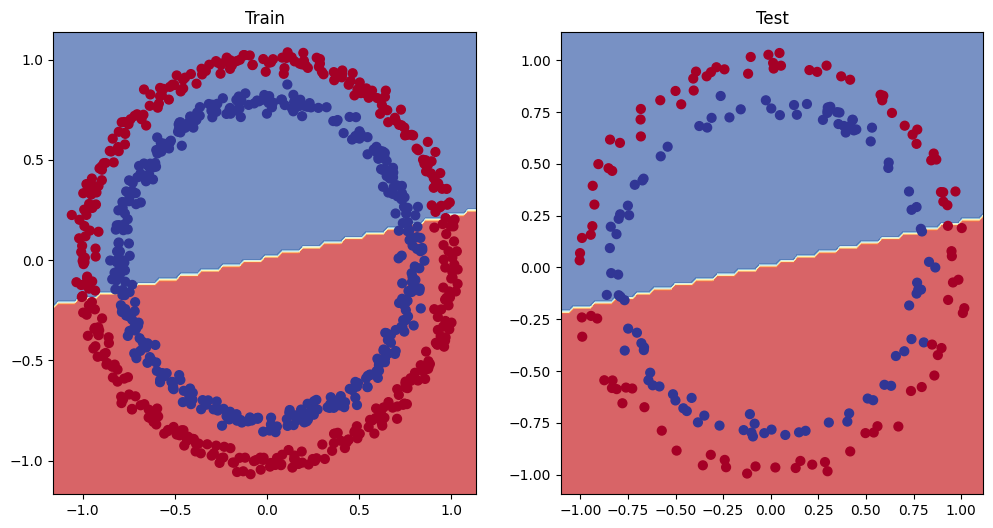

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a large problem is to test out a smaller problem

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(X_test_regression)

(80, 20)

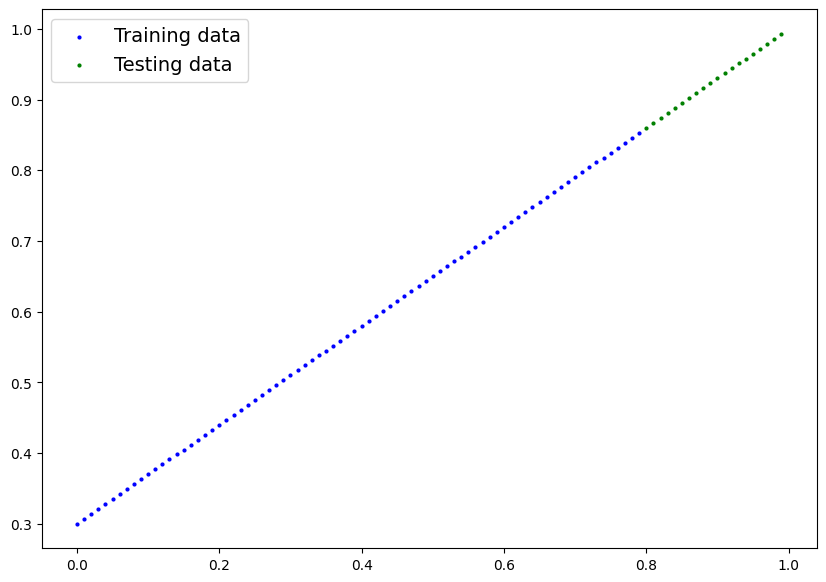

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels = y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

### 5.2 Adjusting `model_1` to fit a straight line


In [ ]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
# Same achitecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
# Training the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training loop
for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)


  #print out what's happening
  if epoch %10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 10 | Loss: 0.40240 | Test loss: 0.50474
Epoch: 20 | Loss: 0.06007 | Test loss: 0.10151
Epoch: 30 | Loss: 0.01559 | Test loss: 0.03231
Epoch: 40 | Loss: 0.03092 | Test loss: 0.00111
Epoch: 50 | Loss: 0.03196 | Test loss: 0.00108
Epoch: 60 | Loss: 0.03192 | Test loss: 0.00170
Epoch: 70 | Loss: 0.03081 | Test loss: 0.00097
Epoch: 80 | Loss: 0.03077 | Test loss: 0.00150
Epoch: 90 | Loss: 0.02967 | Test loss: 0.00092
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 110 | Loss: 0.02962 | Test loss: 0.00197
Epoch: 120 | Loss: 0.02748 | Test loss: 0.00091
Epoch: 130 | Loss: 0.02852 | Test loss: 0.00181
Epoch: 140 | Loss: 0.02850 | Test loss: 0.00246
Epoch: 150 | Loss: 0.02744 | Test loss: 0.00169
Epoch: 160 | Loss: 0.02638 | Test loss: 0.00123
Epoch: 170 | Loss: 0.02637 | Test loss: 0.00162
Epoch: 180 | Loss: 0.02532 | Test loss: 0.00125
Epoch: 190 | Loss: 0.02636 | Test loss: 0.00284
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epo

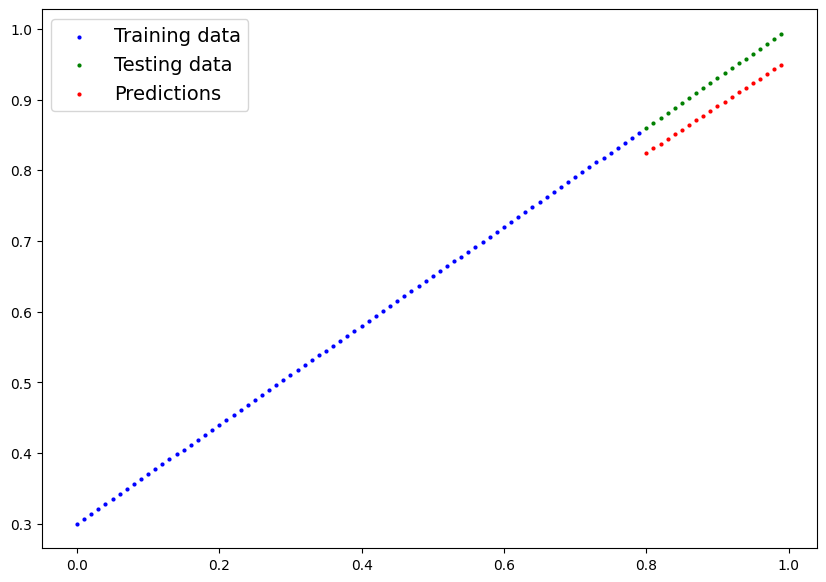

In [ ]:
model_2.eval()

# Make predictions inference
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(), #put .cpu() to send all the values to CPU (to avoid Type error)
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions = y_preds.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite - very large) of linear and non-linear-functions?

### 6.1 Recreating non-linear data (red and blue circles)

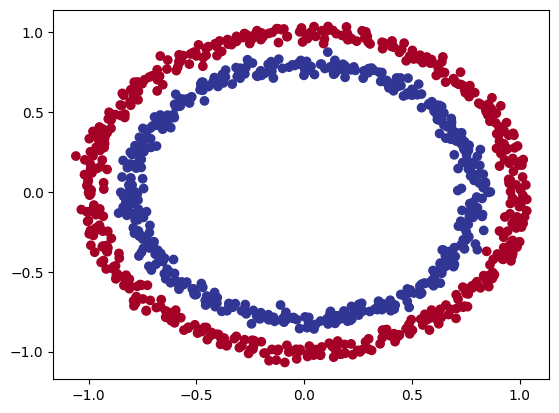

In [ ]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Convert data to tensors and them to train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight linear (constant slope)
* Non-linear = non-straight lines

Artificial neural networks are a large combnination of linear(straight) and non-linear (non-straight) functions which are potentially able to find patterns in data.

In [ ]:
# Build a model with non linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is an activation function

  def forward(self, x):
    # where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))) # Input in Layer_1 -> Output in ReLU -> Output in Layer_2 -> Output in ReLU -> Output in Layer_3


model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put all data in the same device ("CUDA")
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes logits in first input)

  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Setp the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch %100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc.: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc.: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929 | Acc.: 50.00% | Test loss: 0.6932 | Test acc.: 50.00%
Epoch: 100 | Loss: 0.6912 | Acc.: 52.88% | Test loss: 0.6910 | Test acc.: 52.50%
Epoch: 200 | Loss: 0.6898 | Acc.: 53.37% | Test loss: 0.6894 | Test acc.: 55.00%
Epoch: 300 | Loss: 0.6879 | Acc.: 53.00% | Test loss: 0.6872 | Test acc.: 56.00%
Epoch: 400 | Loss: 0.6852 | Acc.: 52.75% | Test loss: 0.6841 | Test acc.: 56.50%
Epoch: 500 | Loss: 0.6810 | Acc.: 52.75% | Test loss: 0.6794 | Test acc.: 56.50%
Epoch: 600 | Loss: 0.6751 | Acc.: 54.50% | Test loss: 0.6729 | Test acc.: 56.00%
Epoch: 700 | Loss: 0.6666 | Acc.: 58.38% | Test loss: 0.6632 | Test acc.: 59.00%
Epoch: 800 | Loss: 0.6516 | Acc.: 64.00% | Test loss: 0.6476 | Test acc.: 67.50%
Epoch: 900 | Loss: 0.6236 | Acc.: 74.00% | Test loss: 0.6215 | Test acc.: 79.00%


### 6.4 Evaluating a model trained with non-linear activation fuuntions

In [ ]:
# Makes predictions
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

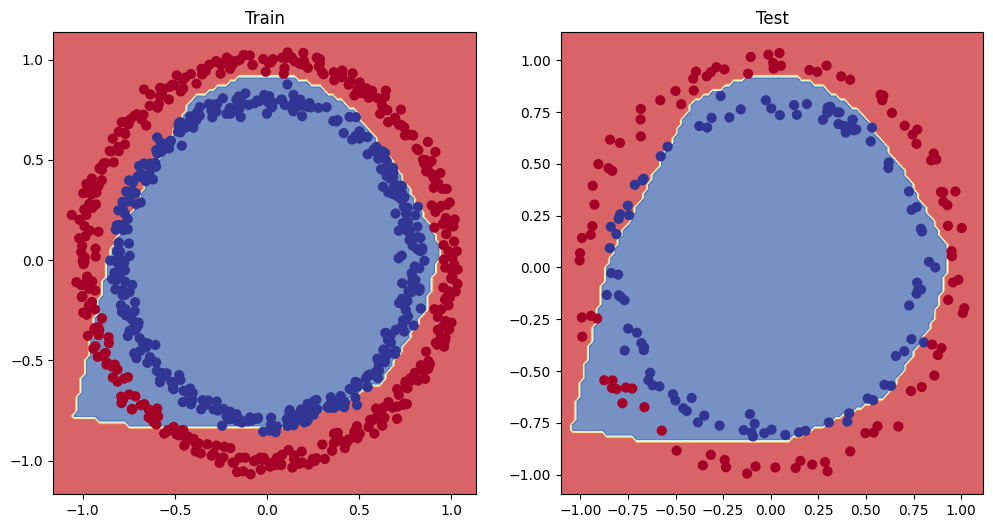

In [ ]:
# Plot decision boundaries

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the best patterns on its own.

And these tools are linear & non-linear functions.

In [ ]:
# Create a tensor

A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

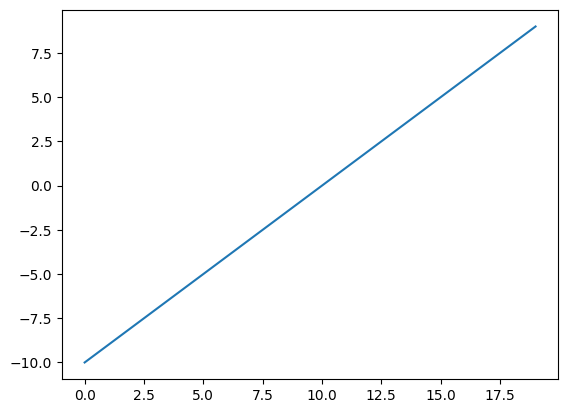

In [ ]:
# Visualize the tensor
plt.plot(A)

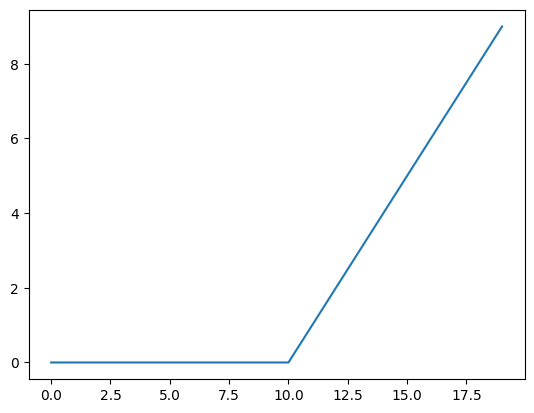

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

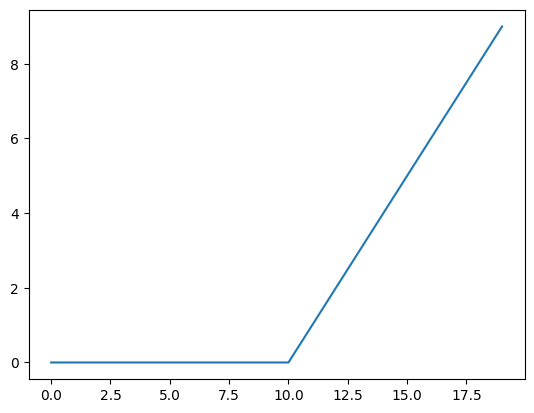

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A));

In [ ]:
# Sigmoid

def sigmoid(x):
  return 1/(1+torch.exp(-x))

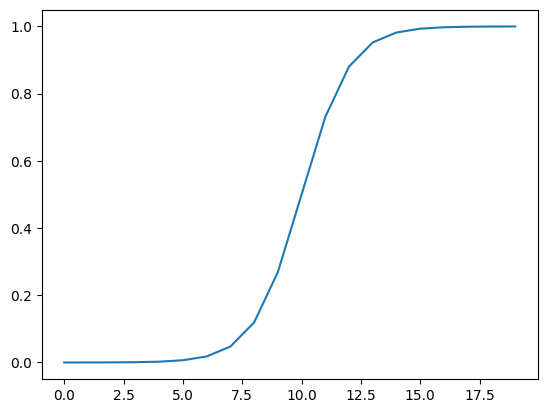

In [ ]:
plt.plot(torch.sigmoid(A))

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (Cat x Dog, Spam X Not Spam, Fraud X Not Fraud...)

*Multi-class classification = more than one thing (Cat X Dog X Chicken...)

### 8.1 Creating a toy multi-class dataset

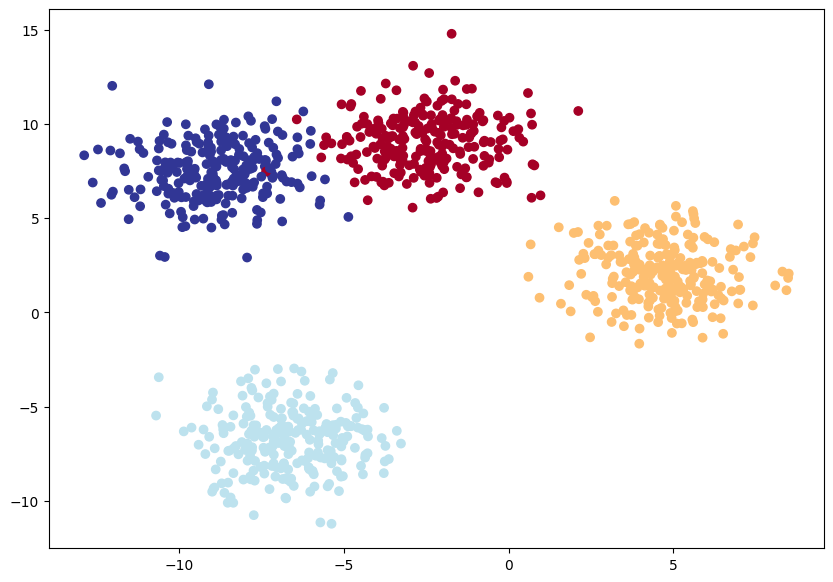

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) #CrossEntropyLoss() generally uses classes indices (so, integer numbers)

# 3. Split into tran and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot the data (visualization)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building multi-class classification model

In [ ]:
# Create devcie agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build a multiclass classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): number of input features of the model
      output_features (int): number of output features (number of output classes)
      hidden_units (int): number of hidden units between layers (defaul: 8)

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features= output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,  # because the data have 2 X features
                    output_features=4, # number of the classes
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Creating loss function and an optimizer for a multi-class classification model


In [ ]:
# Create an optimizer
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can change

### 8.4 Getting prediction probabilities for a multiclass PyTorch model

In order to evaluate and train and test the model, convert the model's outputs (logits) to prediction probabilities and them to predict labels is necessary.

Logits (raw outputs of the model) -> Prediction probabilities (using `torch.softmax()`) -> Prediction labels (taking the `torch.argmax()` of the prediction probabilities.

In [ ]:
# Some raw outputs (logits)
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
# COnver model's logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


Each line of the model represents the "percentage" of the probability of the dot be to a class; because of this the sum of values in each line is 1 (100%).

In [ ]:
# Convert the model's prediction probabilities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training and testing loop for a multi-class PyTorch model


In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set epochs
epochs = 100

#Put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ## Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss= loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  if epoch %10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc.: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1588 | Acc.: 40.38% | Test loss: 1.0755 | Test acc: 48.00%
Epoch: 10 | Loss: 0.6448 | Acc.: 96.75% | Test loss: 0.6607 | Test acc: 97.50%
Epoch: 20 | Loss: 0.4254 | Acc.: 98.50% | Test loss: 0.4307 | Test acc: 100.00%
Epoch: 30 | Loss: 0.2529 | Acc.: 99.12% | Test loss: 0.2451 | Test acc: 99.50%
Epoch: 40 | Loss: 0.1123 | Acc.: 99.25% | Test loss: 0.1023 | Test acc: 99.50%
Epoch: 50 | Loss: 0.0663 | Acc.: 99.25% | Test loss: 0.0585 | Test acc: 99.50%
Epoch: 60 | Loss: 0.0507 | Acc.: 99.25% | Test loss: 0.0429 | Test acc: 99.50%
Epoch: 70 | Loss: 0.0430 | Acc.: 99.25% | Test loss: 0.0349 | Test acc: 99.50%
Epoch: 80 | Loss: 0.0384 | Acc.: 99.25% | Test loss: 0.0299 | Test acc: 99.50%
Epoch: 90 | Loss: 0.0352 | Acc.: 99.25% | Test loss: 0.0266 | Test acc: 99.50%


### 8.6 Making and Evaluating predictions with PyTorch multi-class classification model

In [ ]:
# Make preditions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predicitions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [ ]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)

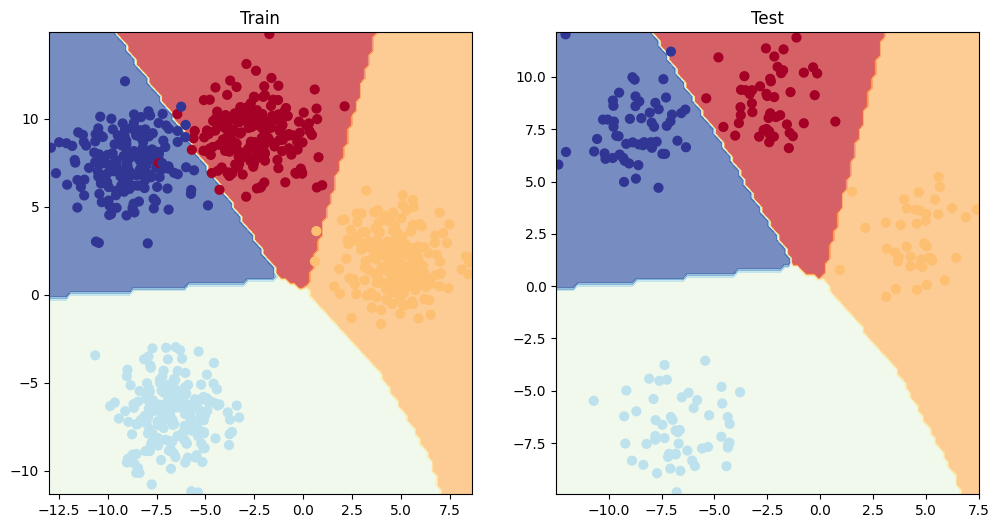

In [ ]:
 plt.figure(figsize=(12,6))
 plt.subplot(1,2,1)
 plt.title("Train")
 plot_decision_boundary(model_4, X_blob_train, y_blob_train)
 plt.subplot(1,2,2)
 plt.title("Test")
 plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics (to evaluate the classification model)

* **Accuracy** - out of 100 samples, how many does the model get right? (Pretty good to use when the data has balanced classes)

* **Precision** - Precision is metric used when False Positives are important

* **Recall** - Recall is a metric used when True Positives are important (See also *Precision-Recall tradeoff*)

* **F1-score** -

* **Classification report** -

Extra-curricular: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

PyTorch metrics -

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy
# Setup metrics
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

In [ ]:
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

## 10. Exercises (Classification)

### 10.1 - Make a binary classification dataset with Scikit-Learn's `make_moons()` function.

* For consistency, the dataset should have 1000 samples and a random_state=42.

* Turn the data into PyTorch tensors. Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [ ]:
import sklearn
from sklearn.datasets import make_moons

n_samples = 1000

X, y = make_moons(n_samples = 1000,
                  noise = 0.03,
                  random_state = 42)

len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908]]),
 array([1, 1, 1, 1, 0]))

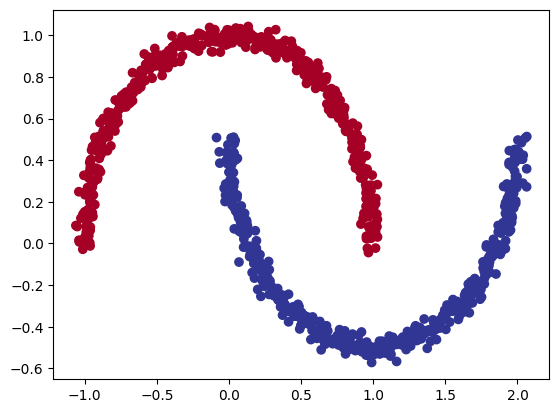

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Turn data into tensors
import torch

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                    y,
                                    test_size=0.2,
                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
# Creating the model
class MoonModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = MoonModel().to(device)
model

MoonModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Creating optimizer and Loss function

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.1)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) *100
  return acc

In [ ]:
# Training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1500

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():

    test_logits = model(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)
    if epoch %100 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc.: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc.: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6954 | Acc.: 37.75% | Test loss: 0.6946 | Test acc.: 49.50%
Epoch: 100 | Loss: 0.3864 | Acc.: 81.88% | Test loss: 0.4020 | Test acc.: 77.00%
Epoch: 200 | Loss: 0.2366 | Acc.: 88.62% | Test loss: 0.2376 | Test acc.: 90.00%
Epoch: 300 | Loss: 0.1908 | Acc.: 91.38% | Test loss: 0.1853 | Test acc.: 92.50%
Epoch: 400 | Loss: 0.1515 | Acc.: 93.75% | Test loss: 0.1445 | Test acc.: 94.00%
Epoch: 500 | Loss: 0.1069 | Acc.: 95.62% | Test loss: 0.0997 | Test acc.: 97.50%
Epoch: 600 | Loss: 0.0690 | Acc.: 98.50% | Test loss: 0.0630 | Test acc.: 99.00%
Epoch: 700 | Loss: 0.0442 | Acc.: 99.75% | Test loss: 0.0394 | Test acc.: 99.50%
Epoch: 800 | Loss: 0.0301 | Acc.: 100.00% | Test loss: 0.0262 | Test acc.: 100.00%
Epoch: 900 | Loss: 0.0219 | Acc.: 100.00% | Test loss: 0.0189 | Test acc.: 100.00%
Epoch: 1000 | Loss: 0.0168 | Acc.: 100.00% | Test loss: 0.0143 | Test acc.: 100.00%
Epoch: 1100 | Loss: 0.0134 | Acc.: 100.00% | Test loss: 0.0114 | Test acc.: 100.00%
Epoch: 1200 | Loss: 

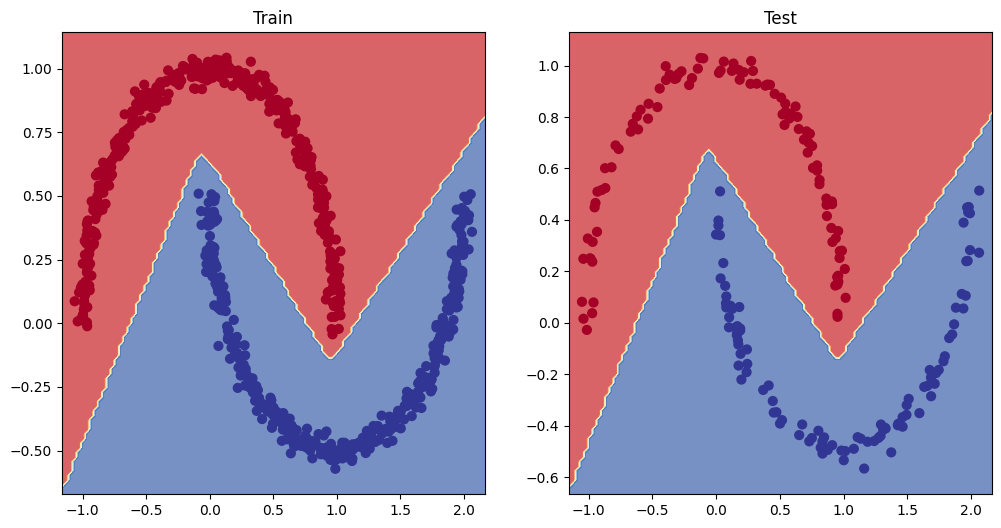

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

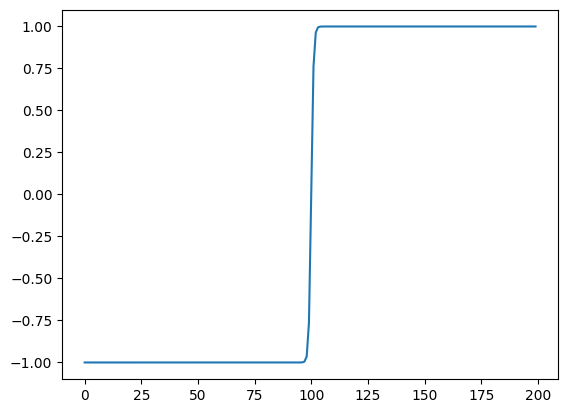

In [ ]:
# Replicating Tanh
import numpy as np
tensor_a = torch.arange(-100, 100, 1)
plt.plot(torch.tanh(tensor_a))

In [ ]:
def tanh_fn(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

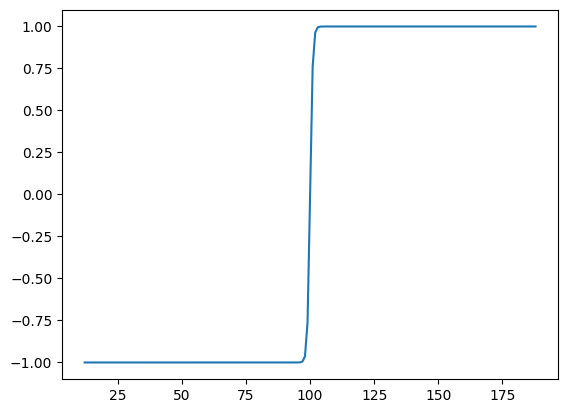

In [ ]:
plt.plot(tanh_fn(tensor_a))

### 10.3 Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).

* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).

* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

<function matplotlib.pyplot.show(close=None, block=None)>

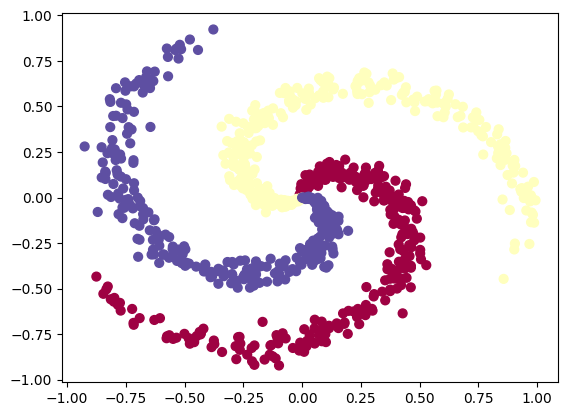

In [ ]:
# Creating toy data
import numpy as np

N = 300 # Number of points per class
D = 2   # Dimensionality (Input features)
K = 3   # number of classes

RANDOM_SEED = 42

X = np.zeros((N*K,D))            # data matrix (each row = single example)
y = np.zeros(N*K, dtype="uint8") #class labels

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 #theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

# visualizing
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            s=40,
            cmap=plt.cm.Spectral)
plt.show

In [ ]:
X.shape, y.shape

(torch.Size([900, 2]), torch.Size([900]))

In [ ]:
# Splitting train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(720, 180, 720, 180)

In [ ]:
# device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Creating class

class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

model_spiral = SpiralModel(input_features = D,
                           output_features = K,
                           hidden_units=8).to(device)

In [ ]:
model_spiral

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [ ]:
# Creating loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_spiral.parameters(),
                            lr = 0.01)

In [ ]:
y_test.shape

torch.Size([180])

In [ ]:
# Creating a trainin loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(y_test.shape)
# Epochs
epochs = 3000

for epoch in range(epochs):
  model_spiral.train()

  y_logits = model_spiral(X_train)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model_spiral(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc.: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc.: {test_acc:.2f}%")

torch.Size([180])
Epoch: 0 | Loss: 1.0992 | Acc.: 33.33% | Test loss: 1.0970 | Test acc.: 33.33%
Epoch: 100 | Loss: 0.5145 | Acc.: 73.61% | Test loss: 0.5359 | Test acc.: 72.78%
Epoch: 200 | Loss: 0.2235 | Acc.: 92.36% | Test loss: 0.2342 | Test acc.: 91.11%
Epoch: 300 | Loss: 0.1027 | Acc.: 96.81% | Test loss: 0.1039 | Test acc.: 96.11%
Epoch: 400 | Loss: 0.0717 | Acc.: 98.06% | Test loss: 0.1122 | Test acc.: 98.89%
Epoch: 500 | Loss: 0.0524 | Acc.: 98.75% | Test loss: 0.1117 | Test acc.: 98.89%
Epoch: 600 | Loss: 0.0382 | Acc.: 98.89% | Test loss: 0.1104 | Test acc.: 98.89%
Epoch: 700 | Loss: 0.0307 | Acc.: 99.17% | Test loss: 0.0892 | Test acc.: 99.44%
Epoch: 800 | Loss: 0.0257 | Acc.: 99.31% | Test loss: 0.0747 | Test acc.: 99.44%
Epoch: 900 | Loss: 0.0221 | Acc.: 99.31% | Test loss: 0.0429 | Test acc.: 99.44%
Epoch: 1000 | Loss: 0.0193 | Acc.: 99.31% | Test loss: 0.0169 | Test acc.: 99.44%
Epoch: 1100 | Loss: 0.0171 | Acc.: 99.31% | Test loss: 0.0108 | Test acc.: 100.00%
Epoch: 12

In [ ]:
model_spiral.eval()
with torch.inference_mode():
  y_logits=model_spiral(X_test)
y_logits[:10]

tensor([[ 12.2787, -12.9769,  -0.8419],
        [ -8.8897,  -5.3185,   8.3585],
        [ 68.2327, -22.6685,   4.9621],
        [  8.6200,  29.6814, -25.4182],
        [  7.4558,  -7.3480,  -5.5995],
        [  9.2375,  -5.5746,  31.3799],
        [ 21.2216, -17.4591,  10.7087],
        [ 13.8581, -12.7895,   3.3073],
        [ 14.8116, -16.8386,   3.1644],
        [ 16.6768, -19.0879,   6.4926]], device='cuda:0')

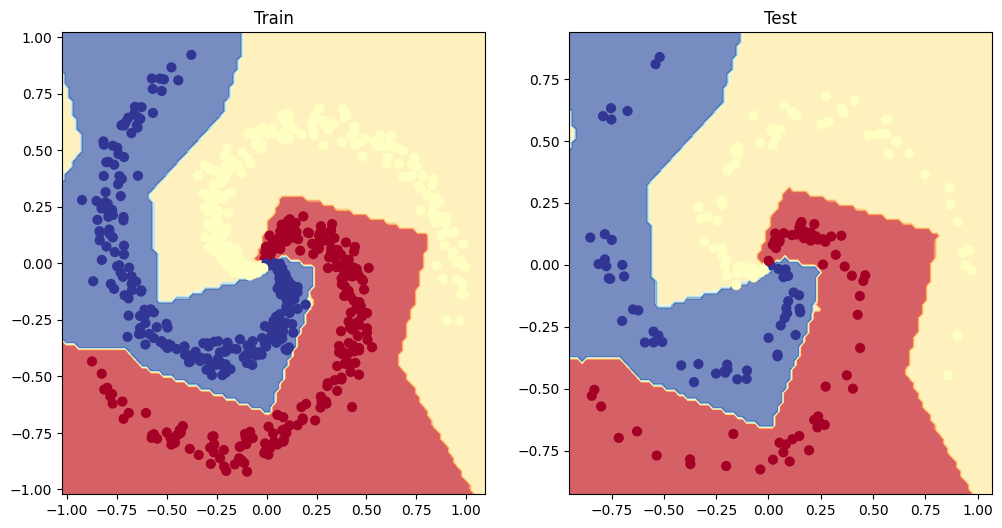

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_spiral, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_spiral, X_test, y_test)